In [2]:
%pwd

'/home/nemanja/Desktop/Projects/Kaggle/House_Prices-Advanced_Regression_Techniques/house_price_kaggle/notebooks'

In [3]:
%cd ..

/home/nemanja/Desktop/Projects/Kaggle/House_Prices-Advanced_Regression_Techniques/house_price_kaggle


In [4]:
import pandas as pd 
import numpy as np

from fastai.imports import *     # We are data scientists prototyping models. This is not production code!
from fastai.structured import *  # Importing everything and having everything available is quicker and more useful

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

from plotnine import *

/home/nemanja/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [305]:
df_raw = pd.read_csv("data/train.csv") 

In [306]:
df_raw.MSSubClass = df_raw.MSSubClass.astype('object')

In [307]:
def display_all(df):
    with pd.option_context("display.max_rows", 2000, "display.max_columns", 100): 
        display(df)

In [308]:
display_all(df_raw.iloc[:100])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [309]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [310]:
df_raw.sort_values(by=['YrSold'], inplace=True, ascending=True)
#df_raw['YrSold'].tail(70)

In [311]:
train_cats(df_raw)

In [312]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [313]:
df_raw.reset_index(inplace=True, drop=True)
df_raw.drop(axis=1,columns=['Id','PoolQC','MiscFeature','Fence','Alley','FireplaceQu'],inplace=True)


In [314]:
df_new = df_raw.query('YearRemodAdd>1940')

In [382]:
df, y, nas = proc_df(df_new, 'SalePrice')
df.shape

(1460, 77)

In [383]:
#A bit of feature engineering
df['Age'] = df['YrSold']-df['YearBuilt']
df['Garage'] = df['GarageArea']/df['GarageCars']
#df['QualityScore'] = df['OverallQual']*df['OverallCond']
df.drop(['GarageCars','GarageArea'],axis=1,inplace=True)
#df.drop(['MiscFeature','Fireplaces','Exterior2nd'],axis=1,inplace=True)
df['Garage'] = df['Garage'].fillna(0)
df['Qual'] = df['OverallQual']+df['OverallCond']
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df.drop(['OverallQual','OverallCond','TotalBsmtSF','1stFlrSF','2ndFlrSF','YearBuilt'],axis=1,inplace=True)


In [384]:
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.2, random_state=42)

In [385]:
#display_all(df.iloc[:1460])

In [386]:
#display_all(y[:1460])

In [387]:
def rmse(predictions, actuals): 
    return math.sqrt(((predictions - actuals)**2).mean())

def print_score(m):
    # RMSE for training, RMSE for validation, r^2 (accuracy) for training, r^2 for validation
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [388]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07885075851029834, 0.1355785372318875, 0.9603681350554815, 0.891436505090561, 0.8612018302131437]


KeyError: 'YearBuilt'

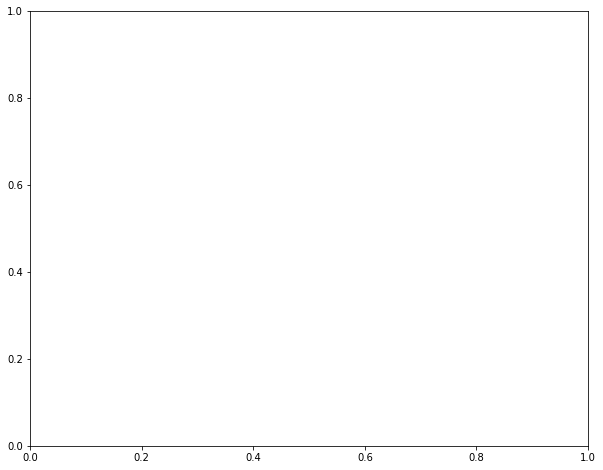

In [389]:
X_valid.plot('YearBuilt', 'GrLivArea', 'scatter', alpha=0.5, figsize=(10,8));

In [ ]:
X_valid.plot('YearBuilt', 'GrLivArea', 'scatter', alpha=0.5, figsize=(10,8));

In [390]:
fi = rf_feat_importance(m, df)
fi[:20] # Top 10

,cols,imp
72,TotalSF,0.458795
69,Age,0.139191
38,GrLivArea,0.072920
71,Qual,0.056045
22,ExterQual,0.050111
50,GarageYrBlt,0.023818
3,LotArea,0.020893
29,BsmtFinSF1,0.014547
41,FullBath,0.013958
15,YearRemodAdd,0.011041


In [398]:
to_keep = fi[fi.imp>0.01].cols
len(to_keep)

12

In [399]:
df_keep = df[to_keep].copy()
X_train, X_valid, y_train, y_valid = train_test_split(df_keep, y, test_size=0.2, random_state=420)

In [400]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08858174373885853, 0.11638946280664961, 0.9511003788906015, 0.9111089084453197, 0.8682631042442137]


In [401]:
fi = rf_feat_importance(m, df_keep)
fi[:18] # Top 10

,cols,imp
0,TotalSF,0.480089
1,Age,0.144020
2,GrLivArea,0.104350
3,Qual,0.087435
6,LotArea,0.032666
5,GarageYrBlt,0.032532
7,BsmtFinSF1,0.024270
9,YearRemodAdd,0.023696
4,ExterQual,0.021915
11,CentralAir,0.018419


In [375]:
from scipy.cluster import hierarchy as hc
scipy.__version__

'1.5.0'

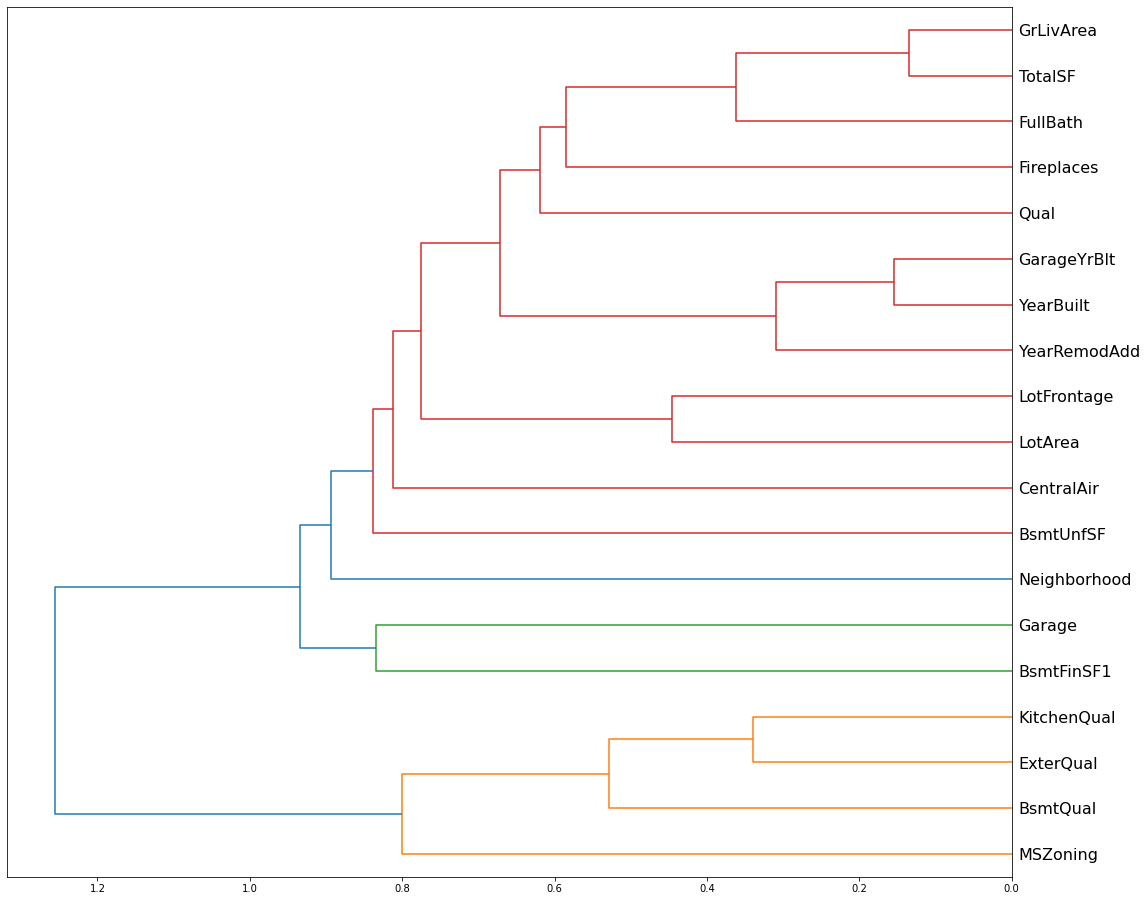

In [376]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4) # correlation matrix
corr_condensed = hc.distance.squareform(1-corr)                # distances matrix
z = hc.linkage(corr_condensed, method='average')               # hierarchical/agglomerative clustering

fig = plt.figure(figsize=(18,16))
dendrogram = hc.dendrogram(z, labels = list(df_keep.columns), orientation='left', leaf_font_size=16)
plt.show()

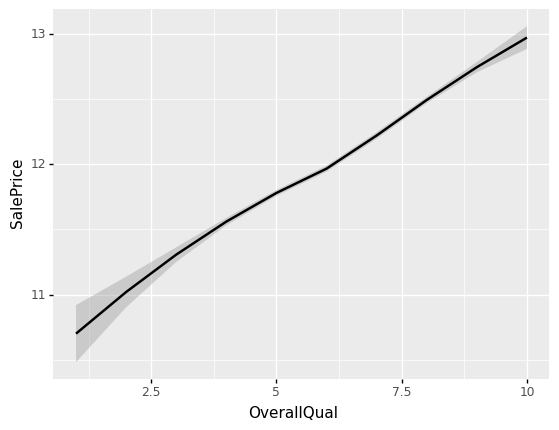

<ggplot: (8742785358382)>

In [29]:
ggplot(df_raw, aes('OverallQual','SalePrice'))+stat_smooth(se=True, method='loess')

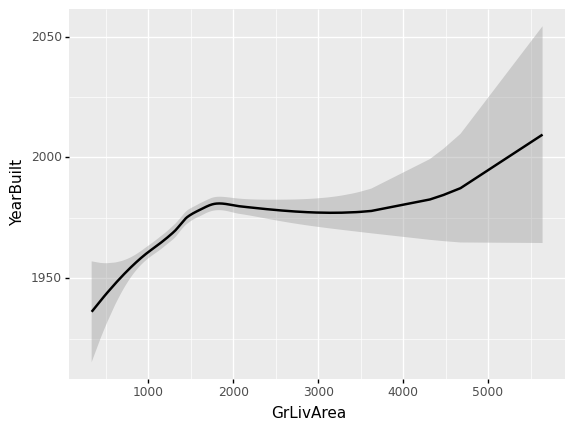

<ggplot: (8742759081367)>

In [30]:
ggplot(df_raw, aes('GrLivArea','YearBuilt'))+stat_smooth(se=True, method='loess')

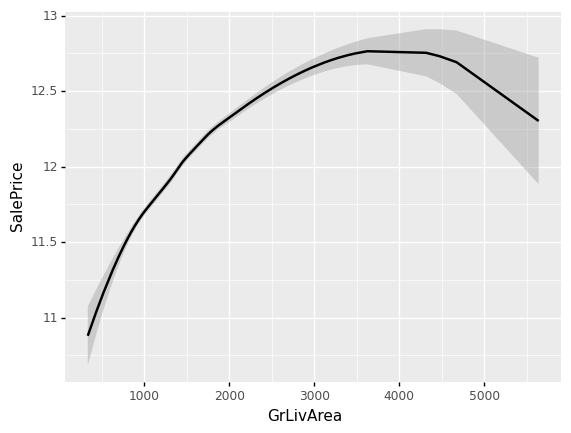

<ggplot: (8742758881386)>

In [31]:
ggplot(df_raw, aes('GrLivArea','SalePrice'))+stat_smooth(se=True, method='loess')

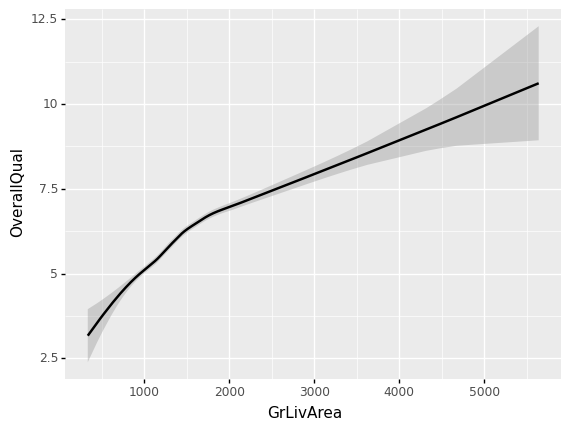

<ggplot: (8742758845910)>

In [32]:
ggplot(df_raw, aes('GrLivArea','OverallQual'))+stat_smooth(se=True, method='loess')

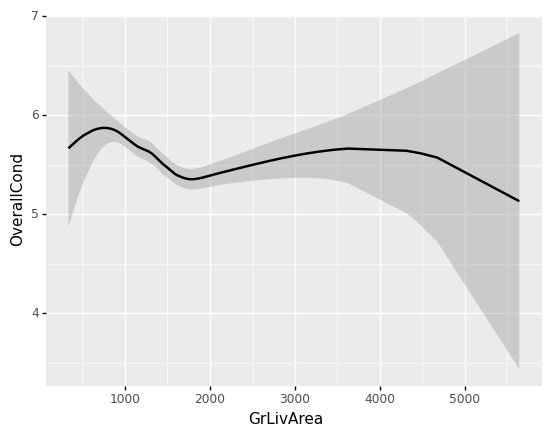

<ggplot: (8742758812305)>

In [81]:
ggplot(df_raw, aes('GrLivArea','OverallCond'))+stat_smooth(se=True, method='loess')

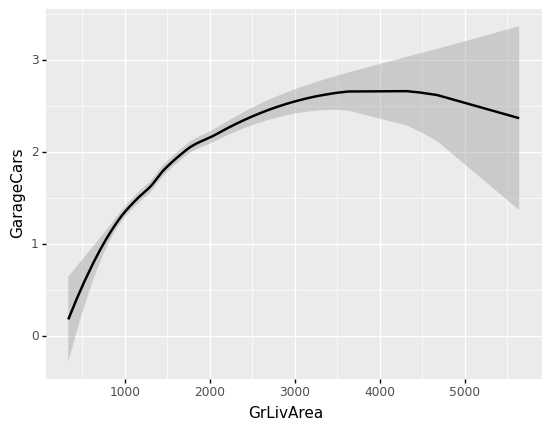

<ggplot: (8742758812507)>

In [82]:
ggplot(df_raw, aes('GrLivArea','GarageCars'))+stat_smooth(se=True, method='loess')

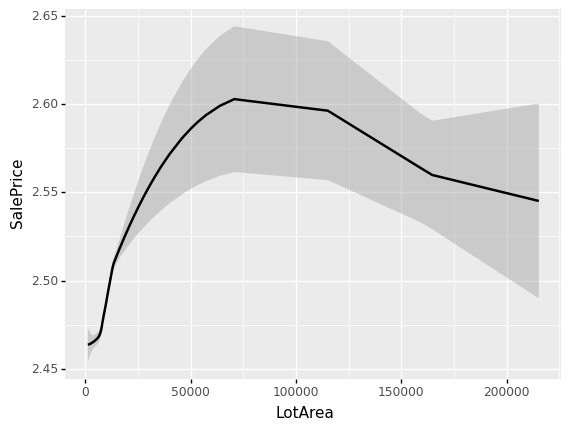

<ggplot: (8779065587869)>

In [412]:
ggplot(df_raw, aes('LotArea','SalePrice'))+stat_smooth(se=True, method='loess')

In [116]:
pip install plotnine

     |████████████████████████████████| 4.4 MB 31 kB/s  eta 0:00:01
  Using cached matplotlib-3.3.3-cp38-cp38-manylinux1_x86_64.whl (11.6 MB)
     |████████████████████████████████| 62 kB 296 kB/s eta 0:00:011
     |████████████████████████████████| 9.7 MB 87 kB/s  eta 0:00:01
     |████████████████████████████████| 111 kB 3.7 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.0
    Uninstalling matplotlib-3.1.0:
      Successfully uninstalled matplotlib-3.1.0
  Attempting uninstall: pandas
    Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

apache-airflow 1.10.10 requires catt

In [31]:
from plotnine import ggplot, aes, geom_line, stat_smooth

In [123]:
pip install scikit-misc

     |████████████████████████████████| 8.7 MB 57 kB/s  eta 0:00:01
You should consider upgrading via the '/home/nemanja/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


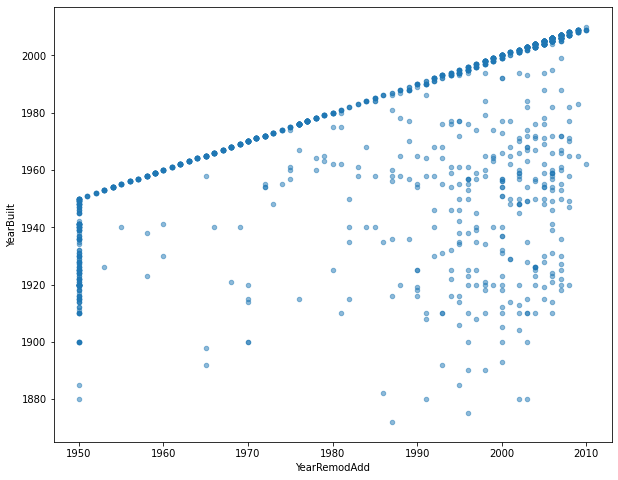

In [57]:
df_raw.plot('YearRemodAdd', 'YearBuilt', 'scatter', alpha=0.5, figsize=(10,8));

In [222]:
df_raw.GrLivArea

0       1603
1       1218
2       1262
3        943
4        912
        ... 
1455     720
1456    1923
1457    1541
1458    1947
1459    2447
Name: GrLivArea, Length: 1460, dtype: int64

In [230]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.25, random_state=420)
    m.fit(X_train, y_train)
    return m.oob_score_

In [231]:
get_oob(df_keep)

0.8570403727975987

In [233]:
for c in ('FireplaceQu', 'Fireplaces', 'GarageArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

FireplaceQu 0.855919058686414
Fireplaces 0.8591828194669296
GarageArea 0.8592826322907856
GarageCars 0.8570513524209046
TotalBsmtSF 0.8548528295741182
1stFlrSF 0.8575568284717903


In [235]:
df_keep.drop('FireplaceQu',axis=1,inplace=True)

In [236]:
df_keep.drop('GarageArea',axis=1,inplace=True)

In [394]:
X_train, X_valid, y_train, y_valid = train_test_split(df_keep, y, test_size=0.2, random_state=420)

In [357]:
m = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08406173463438416, 0.11098300390903658, 0.9562474058021847, 0.9121933984577745, 0.8768216506825108]


In [221]:
import xgboost as xgb

In [253]:
X_train, X_valid, y_train, y_valid = train_test_split(df_new, y, test_size=0.2, random_state=420)

In [395]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [396]:
dtest = xgb.DMatrix(X_valid, label=y_valid)

In [397]:
param = {'max_depth': 5, 'eta': 0.015}
param['nthread'] = 4
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 5000
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-rmse:11.40723	train-rmse:11.34634
[1]	eval-rmse:11.23738	train-rmse:11.17650
[2]	eval-rmse:11.07009	train-rmse:11.00921
[3]	eval-rmse:10.90531	train-rmse:10.84444
[4]	eval-rmse:10.74300	train-rmse:10.68214
[5]	eval-rmse:10.58312	train-rmse:10.52227
[6]	eval-rmse:10.42565	train-rmse:10.36480
[7]	eval-rmse:10.27053	train-rmse:10.20969
[8]	eval-rmse:10.11775	train-rmse:10.05692
[9]	eval-rmse:9.96726	train-rmse:9.90643
[10]	eval-rmse:9.81902	train-rmse:9.75821
[11]	eval-rmse:9.67302	train-rmse:9.61221
[12]	eval-rmse:9.52920	train-rmse:9.46840
[13]	eval-rmse:9.38755	train-rmse:9.32675
[14]	eval-rmse:9.24802	train-rmse:9.18723
[15]	eval-rmse:9.11058	train-rmse:9.04980
[16]	eval-rmse:8.97489	train-rmse:8.91444
[17]	eval-rmse:8.84118	train-rmse:8.78110
[18]	eval-rmse:8.70952	train-rmse:8.64977
[19]	eval-rmse:8.57980	train-rmse:8.52040
[20]	eval-rmse:8.45205	train-rmse:8.39297
[21]	eval-rmse:8.32618	train-rmse:8.26745
[22]	eval-rmse:8.20224	train-rmse:8.14382
[23]	eval-rmse:8.08012	tra

[193]	eval-rmse:0.65668	train-rmse:0.63880
[194]	eval-rmse:0.64751	train-rmse:0.62967
[195]	eval-rmse:0.63836	train-rmse:0.62067
[196]	eval-rmse:0.62943	train-rmse:0.61181
[197]	eval-rmse:0.62069	train-rmse:0.60308
[198]	eval-rmse:0.61190	train-rmse:0.59448
[199]	eval-rmse:0.60336	train-rmse:0.58601
[200]	eval-rmse:0.59491	train-rmse:0.57768
[201]	eval-rmse:0.58647	train-rmse:0.56946
[202]	eval-rmse:0.57839	train-rmse:0.56136
[203]	eval-rmse:0.57023	train-rmse:0.55340
[204]	eval-rmse:0.56234	train-rmse:0.54556
[205]	eval-rmse:0.55444	train-rmse:0.53784
[206]	eval-rmse:0.54668	train-rmse:0.53023
[207]	eval-rmse:0.53903	train-rmse:0.52275
[208]	eval-rmse:0.53141	train-rmse:0.51537
[209]	eval-rmse:0.52406	train-rmse:0.50810
[210]	eval-rmse:0.51687	train-rmse:0.50096
[211]	eval-rmse:0.50979	train-rmse:0.49391
[212]	eval-rmse:0.50270	train-rmse:0.48697
[213]	eval-rmse:0.49574	train-rmse:0.48014
[214]	eval-rmse:0.48904	train-rmse:0.47342
[215]	eval-rmse:0.48239	train-rmse:0.46680
[216]	eval-

[384]	eval-rmse:0.11923	train-rmse:0.09438
[385]	eval-rmse:0.11898	train-rmse:0.09408
[386]	eval-rmse:0.11875	train-rmse:0.09371
[387]	eval-rmse:0.11853	train-rmse:0.09345
[388]	eval-rmse:0.11829	train-rmse:0.09316
[389]	eval-rmse:0.11801	train-rmse:0.09281
[390]	eval-rmse:0.11780	train-rmse:0.09257
[391]	eval-rmse:0.11758	train-rmse:0.09230
[392]	eval-rmse:0.11739	train-rmse:0.09204
[393]	eval-rmse:0.11721	train-rmse:0.09182
[394]	eval-rmse:0.11696	train-rmse:0.09156
[395]	eval-rmse:0.11678	train-rmse:0.09133
[396]	eval-rmse:0.11658	train-rmse:0.09108
[397]	eval-rmse:0.11633	train-rmse:0.09078
[398]	eval-rmse:0.11620	train-rmse:0.09055
[399]	eval-rmse:0.11602	train-rmse:0.09032
[400]	eval-rmse:0.11583	train-rmse:0.09012
[401]	eval-rmse:0.11564	train-rmse:0.08988
[402]	eval-rmse:0.11547	train-rmse:0.08968
[403]	eval-rmse:0.11532	train-rmse:0.08948
[404]	eval-rmse:0.11518	train-rmse:0.08928
[405]	eval-rmse:0.11498	train-rmse:0.08900
[406]	eval-rmse:0.11483	train-rmse:0.08879
[407]	eval-

[575]	eval-rmse:0.10649	train-rmse:0.07188
[576]	eval-rmse:0.10649	train-rmse:0.07184
[577]	eval-rmse:0.10649	train-rmse:0.07179
[578]	eval-rmse:0.10648	train-rmse:0.07172
[579]	eval-rmse:0.10646	train-rmse:0.07160
[580]	eval-rmse:0.10645	train-rmse:0.07156
[581]	eval-rmse:0.10645	train-rmse:0.07150
[582]	eval-rmse:0.10646	train-rmse:0.07143
[583]	eval-rmse:0.10645	train-rmse:0.07140
[584]	eval-rmse:0.10645	train-rmse:0.07136
[585]	eval-rmse:0.10643	train-rmse:0.07131
[586]	eval-rmse:0.10640	train-rmse:0.07119
[587]	eval-rmse:0.10640	train-rmse:0.07115
[588]	eval-rmse:0.10641	train-rmse:0.07109
[589]	eval-rmse:0.10638	train-rmse:0.07101
[590]	eval-rmse:0.10637	train-rmse:0.07095
[591]	eval-rmse:0.10634	train-rmse:0.07084
[592]	eval-rmse:0.10634	train-rmse:0.07080
[593]	eval-rmse:0.10636	train-rmse:0.07074
[594]	eval-rmse:0.10634	train-rmse:0.07067
[595]	eval-rmse:0.10634	train-rmse:0.07062
[596]	eval-rmse:0.10633	train-rmse:0.07057
[597]	eval-rmse:0.10635	train-rmse:0.07051
[598]	eval-

[766]	eval-rmse:0.10641	train-rmse:0.06078
[767]	eval-rmse:0.10642	train-rmse:0.06075
[768]	eval-rmse:0.10641	train-rmse:0.06072
[769]	eval-rmse:0.10641	train-rmse:0.06069
[770]	eval-rmse:0.10648	train-rmse:0.06062
[771]	eval-rmse:0.10647	train-rmse:0.06059
[772]	eval-rmse:0.10651	train-rmse:0.06048
[773]	eval-rmse:0.10650	train-rmse:0.06045
[774]	eval-rmse:0.10650	train-rmse:0.06042
[775]	eval-rmse:0.10650	train-rmse:0.06041
[776]	eval-rmse:0.10652	train-rmse:0.06033
[777]	eval-rmse:0.10651	train-rmse:0.06029
[778]	eval-rmse:0.10650	train-rmse:0.06026
[779]	eval-rmse:0.10649	train-rmse:0.06022
[780]	eval-rmse:0.10649	train-rmse:0.06013
[781]	eval-rmse:0.10648	train-rmse:0.06010
[782]	eval-rmse:0.10648	train-rmse:0.06008
[783]	eval-rmse:0.10648	train-rmse:0.06005
[784]	eval-rmse:0.10649	train-rmse:0.06003
[785]	eval-rmse:0.10651	train-rmse:0.05992
[786]	eval-rmse:0.10649	train-rmse:0.05987
[787]	eval-rmse:0.10650	train-rmse:0.05979
[788]	eval-rmse:0.10650	train-rmse:0.05975
[789]	eval-

[957]	eval-rmse:0.10726	train-rmse:0.05268
[958]	eval-rmse:0.10728	train-rmse:0.05263
[959]	eval-rmse:0.10729	train-rmse:0.05257
[960]	eval-rmse:0.10729	train-rmse:0.05253
[961]	eval-rmse:0.10730	train-rmse:0.05248
[962]	eval-rmse:0.10730	train-rmse:0.05246
[963]	eval-rmse:0.10731	train-rmse:0.05241
[964]	eval-rmse:0.10732	train-rmse:0.05236
[965]	eval-rmse:0.10732	train-rmse:0.05229
[966]	eval-rmse:0.10732	train-rmse:0.05227
[967]	eval-rmse:0.10735	train-rmse:0.05220
[968]	eval-rmse:0.10736	train-rmse:0.05215
[969]	eval-rmse:0.10736	train-rmse:0.05211
[970]	eval-rmse:0.10739	train-rmse:0.05206
[971]	eval-rmse:0.10740	train-rmse:0.05199
[972]	eval-rmse:0.10741	train-rmse:0.05195
[973]	eval-rmse:0.10741	train-rmse:0.05192
[974]	eval-rmse:0.10742	train-rmse:0.05182
[975]	eval-rmse:0.10742	train-rmse:0.05178
[976]	eval-rmse:0.10744	train-rmse:0.05168
[977]	eval-rmse:0.10743	train-rmse:0.05165
[978]	eval-rmse:0.10743	train-rmse:0.05163
[979]	eval-rmse:0.10742	train-rmse:0.05157
[980]	eval-

[1145]	eval-rmse:0.10818	train-rmse:0.04505
[1146]	eval-rmse:0.10816	train-rmse:0.04499
[1147]	eval-rmse:0.10817	train-rmse:0.04497
[1148]	eval-rmse:0.10817	train-rmse:0.04496
[1149]	eval-rmse:0.10822	train-rmse:0.04488
[1150]	eval-rmse:0.10822	train-rmse:0.04486
[1151]	eval-rmse:0.10822	train-rmse:0.04484
[1152]	eval-rmse:0.10822	train-rmse:0.04484
[1153]	eval-rmse:0.10822	train-rmse:0.04473
[1154]	eval-rmse:0.10822	train-rmse:0.04472
[1155]	eval-rmse:0.10823	train-rmse:0.04471
[1156]	eval-rmse:0.10823	train-rmse:0.04468
[1157]	eval-rmse:0.10824	train-rmse:0.04457
[1158]	eval-rmse:0.10824	train-rmse:0.04454
[1159]	eval-rmse:0.10824	train-rmse:0.04453
[1160]	eval-rmse:0.10829	train-rmse:0.04445
[1161]	eval-rmse:0.10829	train-rmse:0.04445
[1162]	eval-rmse:0.10830	train-rmse:0.04442
[1163]	eval-rmse:0.10831	train-rmse:0.04441
[1164]	eval-rmse:0.10831	train-rmse:0.04439
[1165]	eval-rmse:0.10831	train-rmse:0.04439
[1166]	eval-rmse:0.10834	train-rmse:0.04431
[1167]	eval-rmse:0.10834	train-r

[1332]	eval-rmse:0.10930	train-rmse:0.03966
[1333]	eval-rmse:0.10929	train-rmse:0.03962
[1334]	eval-rmse:0.10931	train-rmse:0.03959
[1335]	eval-rmse:0.10930	train-rmse:0.03955
[1336]	eval-rmse:0.10932	train-rmse:0.03950
[1337]	eval-rmse:0.10932	train-rmse:0.03948
[1338]	eval-rmse:0.10932	train-rmse:0.03946
[1339]	eval-rmse:0.10933	train-rmse:0.03943
[1340]	eval-rmse:0.10933	train-rmse:0.03941
[1341]	eval-rmse:0.10933	train-rmse:0.03939
[1342]	eval-rmse:0.10933	train-rmse:0.03934
[1343]	eval-rmse:0.10933	train-rmse:0.03930
[1344]	eval-rmse:0.10933	train-rmse:0.03928
[1345]	eval-rmse:0.10933	train-rmse:0.03925
[1346]	eval-rmse:0.10934	train-rmse:0.03921
[1347]	eval-rmse:0.10934	train-rmse:0.03918
[1348]	eval-rmse:0.10935	train-rmse:0.03913
[1349]	eval-rmse:0.10937	train-rmse:0.03910
[1350]	eval-rmse:0.10936	train-rmse:0.03909
[1351]	eval-rmse:0.10937	train-rmse:0.03905
[1352]	eval-rmse:0.10936	train-rmse:0.03903
[1353]	eval-rmse:0.10937	train-rmse:0.03902
[1354]	eval-rmse:0.10938	train-r

[1519]	eval-rmse:0.10987	train-rmse:0.03461
[1520]	eval-rmse:0.10988	train-rmse:0.03459
[1521]	eval-rmse:0.10988	train-rmse:0.03456
[1522]	eval-rmse:0.10988	train-rmse:0.03450
[1523]	eval-rmse:0.10988	train-rmse:0.03447
[1524]	eval-rmse:0.10988	train-rmse:0.03444
[1525]	eval-rmse:0.10987	train-rmse:0.03440
[1526]	eval-rmse:0.10987	train-rmse:0.03439
[1527]	eval-rmse:0.10986	train-rmse:0.03437
[1528]	eval-rmse:0.10987	train-rmse:0.03435
[1529]	eval-rmse:0.10987	train-rmse:0.03432
[1530]	eval-rmse:0.10986	train-rmse:0.03431
[1531]	eval-rmse:0.10987	train-rmse:0.03428
[1532]	eval-rmse:0.10987	train-rmse:0.03426
[1533]	eval-rmse:0.10987	train-rmse:0.03423
[1534]	eval-rmse:0.10987	train-rmse:0.03420
[1535]	eval-rmse:0.10987	train-rmse:0.03420
[1536]	eval-rmse:0.10987	train-rmse:0.03415
[1537]	eval-rmse:0.10988	train-rmse:0.03412
[1538]	eval-rmse:0.10988	train-rmse:0.03409
[1539]	eval-rmse:0.10988	train-rmse:0.03406
[1540]	eval-rmse:0.10988	train-rmse:0.03405
[1541]	eval-rmse:0.10988	train-r

[1706]	eval-rmse:0.10992	train-rmse:0.03020
[1707]	eval-rmse:0.10992	train-rmse:0.03019
[1708]	eval-rmse:0.10992	train-rmse:0.03019
[1709]	eval-rmse:0.10992	train-rmse:0.03015
[1710]	eval-rmse:0.10992	train-rmse:0.03012
[1711]	eval-rmse:0.10993	train-rmse:0.03009
[1712]	eval-rmse:0.10994	train-rmse:0.03008
[1713]	eval-rmse:0.10994	train-rmse:0.03007
[1714]	eval-rmse:0.10994	train-rmse:0.03006
[1715]	eval-rmse:0.10994	train-rmse:0.03005
[1716]	eval-rmse:0.10994	train-rmse:0.03005
[1717]	eval-rmse:0.10994	train-rmse:0.03004
[1718]	eval-rmse:0.10994	train-rmse:0.03002
[1719]	eval-rmse:0.10994	train-rmse:0.03001
[1720]	eval-rmse:0.10995	train-rmse:0.03000
[1721]	eval-rmse:0.10995	train-rmse:0.02999
[1722]	eval-rmse:0.10995	train-rmse:0.02998
[1723]	eval-rmse:0.10996	train-rmse:0.02995
[1724]	eval-rmse:0.10995	train-rmse:0.02991
[1725]	eval-rmse:0.10994	train-rmse:0.02989
[1726]	eval-rmse:0.10995	train-rmse:0.02988
[1727]	eval-rmse:0.10995	train-rmse:0.02987
[1728]	eval-rmse:0.10995	train-r

[1893]	eval-rmse:0.11004	train-rmse:0.02691
[1894]	eval-rmse:0.11004	train-rmse:0.02690
[1895]	eval-rmse:0.11004	train-rmse:0.02688
[1896]	eval-rmse:0.11005	train-rmse:0.02684
[1897]	eval-rmse:0.11006	train-rmse:0.02682
[1898]	eval-rmse:0.11006	train-rmse:0.02681
[1899]	eval-rmse:0.11004	train-rmse:0.02678
[1900]	eval-rmse:0.11004	train-rmse:0.02676
[1901]	eval-rmse:0.11003	train-rmse:0.02675
[1902]	eval-rmse:0.11004	train-rmse:0.02674
[1903]	eval-rmse:0.11004	train-rmse:0.02673
[1904]	eval-rmse:0.11004	train-rmse:0.02673
[1905]	eval-rmse:0.11003	train-rmse:0.02671
[1906]	eval-rmse:0.11003	train-rmse:0.02670
[1907]	eval-rmse:0.11005	train-rmse:0.02669
[1908]	eval-rmse:0.11005	train-rmse:0.02668
[1909]	eval-rmse:0.11005	train-rmse:0.02666
[1910]	eval-rmse:0.11005	train-rmse:0.02663
[1911]	eval-rmse:0.11005	train-rmse:0.02662
[1912]	eval-rmse:0.11003	train-rmse:0.02658
[1913]	eval-rmse:0.11003	train-rmse:0.02657
[1914]	eval-rmse:0.11003	train-rmse:0.02655
[1915]	eval-rmse:0.11003	train-r

[2080]	eval-rmse:0.11007	train-rmse:0.02385
[2081]	eval-rmse:0.11006	train-rmse:0.02382
[2082]	eval-rmse:0.11006	train-rmse:0.02381
[2083]	eval-rmse:0.11006	train-rmse:0.02379
[2084]	eval-rmse:0.11006	train-rmse:0.02377
[2085]	eval-rmse:0.11006	train-rmse:0.02376
[2086]	eval-rmse:0.11006	train-rmse:0.02374
[2087]	eval-rmse:0.11005	train-rmse:0.02371
[2088]	eval-rmse:0.11006	train-rmse:0.02369
[2089]	eval-rmse:0.11006	train-rmse:0.02366
[2090]	eval-rmse:0.11006	train-rmse:0.02364
[2091]	eval-rmse:0.11007	train-rmse:0.02361
[2092]	eval-rmse:0.11007	train-rmse:0.02360
[2093]	eval-rmse:0.11007	train-rmse:0.02359
[2094]	eval-rmse:0.11007	train-rmse:0.02356
[2095]	eval-rmse:0.11007	train-rmse:0.02354
[2096]	eval-rmse:0.11006	train-rmse:0.02352
[2097]	eval-rmse:0.11006	train-rmse:0.02350
[2098]	eval-rmse:0.11006	train-rmse:0.02348
[2099]	eval-rmse:0.11007	train-rmse:0.02346
[2100]	eval-rmse:0.11007	train-rmse:0.02346
[2101]	eval-rmse:0.11007	train-rmse:0.02344
[2102]	eval-rmse:0.11007	train-r

[2267]	eval-rmse:0.11014	train-rmse:0.02102
[2268]	eval-rmse:0.11014	train-rmse:0.02101
[2269]	eval-rmse:0.11014	train-rmse:0.02100
[2270]	eval-rmse:0.11013	train-rmse:0.02099
[2271]	eval-rmse:0.11013	train-rmse:0.02099
[2272]	eval-rmse:0.11013	train-rmse:0.02099
[2273]	eval-rmse:0.11014	train-rmse:0.02096
[2274]	eval-rmse:0.11013	train-rmse:0.02095
[2275]	eval-rmse:0.11013	train-rmse:0.02094
[2276]	eval-rmse:0.11013	train-rmse:0.02094
[2277]	eval-rmse:0.11013	train-rmse:0.02092
[2278]	eval-rmse:0.11013	train-rmse:0.02091
[2279]	eval-rmse:0.11014	train-rmse:0.02088
[2280]	eval-rmse:0.11013	train-rmse:0.02087
[2281]	eval-rmse:0.11013	train-rmse:0.02087
[2282]	eval-rmse:0.11014	train-rmse:0.02084
[2283]	eval-rmse:0.11014	train-rmse:0.02083
[2284]	eval-rmse:0.11013	train-rmse:0.02082
[2285]	eval-rmse:0.11014	train-rmse:0.02081
[2286]	eval-rmse:0.11015	train-rmse:0.02080
[2287]	eval-rmse:0.11015	train-rmse:0.02077
[2288]	eval-rmse:0.11015	train-rmse:0.02074
[2289]	eval-rmse:0.11016	train-r

[2454]	eval-rmse:0.11019	train-rmse:0.01894
[2455]	eval-rmse:0.11019	train-rmse:0.01894
[2456]	eval-rmse:0.11019	train-rmse:0.01894
[2457]	eval-rmse:0.11019	train-rmse:0.01893
[2458]	eval-rmse:0.11020	train-rmse:0.01891
[2459]	eval-rmse:0.11020	train-rmse:0.01891
[2460]	eval-rmse:0.11020	train-rmse:0.01890
[2461]	eval-rmse:0.11020	train-rmse:0.01889
[2462]	eval-rmse:0.11020	train-rmse:0.01889
[2463]	eval-rmse:0.11019	train-rmse:0.01888
[2464]	eval-rmse:0.11020	train-rmse:0.01887
[2465]	eval-rmse:0.11019	train-rmse:0.01885
[2466]	eval-rmse:0.11020	train-rmse:0.01883
[2467]	eval-rmse:0.11020	train-rmse:0.01883
[2468]	eval-rmse:0.11020	train-rmse:0.01881
[2469]	eval-rmse:0.11021	train-rmse:0.01880
[2470]	eval-rmse:0.11021	train-rmse:0.01880
[2471]	eval-rmse:0.11021	train-rmse:0.01879
[2472]	eval-rmse:0.11021	train-rmse:0.01878
[2473]	eval-rmse:0.11021	train-rmse:0.01875
[2474]	eval-rmse:0.11020	train-rmse:0.01873
[2475]	eval-rmse:0.11020	train-rmse:0.01873
[2476]	eval-rmse:0.11020	train-r

[2641]	eval-rmse:0.11028	train-rmse:0.01710
[2642]	eval-rmse:0.11028	train-rmse:0.01708
[2643]	eval-rmse:0.11028	train-rmse:0.01708
[2644]	eval-rmse:0.11028	train-rmse:0.01706
[2645]	eval-rmse:0.11028	train-rmse:0.01706
[2646]	eval-rmse:0.11028	train-rmse:0.01705
[2647]	eval-rmse:0.11028	train-rmse:0.01705
[2648]	eval-rmse:0.11029	train-rmse:0.01704
[2649]	eval-rmse:0.11029	train-rmse:0.01703
[2650]	eval-rmse:0.11029	train-rmse:0.01701
[2651]	eval-rmse:0.11029	train-rmse:0.01701
[2652]	eval-rmse:0.11029	train-rmse:0.01699
[2653]	eval-rmse:0.11029	train-rmse:0.01698
[2654]	eval-rmse:0.11029	train-rmse:0.01696
[2655]	eval-rmse:0.11030	train-rmse:0.01696
[2656]	eval-rmse:0.11030	train-rmse:0.01694
[2657]	eval-rmse:0.11030	train-rmse:0.01693
[2658]	eval-rmse:0.11030	train-rmse:0.01693
[2659]	eval-rmse:0.11030	train-rmse:0.01691
[2660]	eval-rmse:0.11030	train-rmse:0.01689
[2661]	eval-rmse:0.11030	train-rmse:0.01689
[2662]	eval-rmse:0.11030	train-rmse:0.01687
[2663]	eval-rmse:0.11030	train-r

[2828]	eval-rmse:0.11037	train-rmse:0.01524
[2829]	eval-rmse:0.11037	train-rmse:0.01524
[2830]	eval-rmse:0.11037	train-rmse:0.01523
[2831]	eval-rmse:0.11037	train-rmse:0.01522
[2832]	eval-rmse:0.11037	train-rmse:0.01521
[2833]	eval-rmse:0.11037	train-rmse:0.01519
[2834]	eval-rmse:0.11037	train-rmse:0.01517
[2835]	eval-rmse:0.11038	train-rmse:0.01516
[2836]	eval-rmse:0.11037	train-rmse:0.01516
[2837]	eval-rmse:0.11037	train-rmse:0.01515
[2838]	eval-rmse:0.11037	train-rmse:0.01513
[2839]	eval-rmse:0.11037	train-rmse:0.01512
[2840]	eval-rmse:0.11037	train-rmse:0.01510
[2841]	eval-rmse:0.11037	train-rmse:0.01509
[2842]	eval-rmse:0.11037	train-rmse:0.01507
[2843]	eval-rmse:0.11037	train-rmse:0.01506
[2844]	eval-rmse:0.11038	train-rmse:0.01505
[2845]	eval-rmse:0.11037	train-rmse:0.01503
[2846]	eval-rmse:0.11037	train-rmse:0.01501
[2847]	eval-rmse:0.11037	train-rmse:0.01500
[2848]	eval-rmse:0.11038	train-rmse:0.01499
[2849]	eval-rmse:0.11038	train-rmse:0.01498
[2850]	eval-rmse:0.11038	train-r

[3015]	eval-rmse:0.11040	train-rmse:0.01338
[3016]	eval-rmse:0.11040	train-rmse:0.01338
[3017]	eval-rmse:0.11040	train-rmse:0.01337
[3018]	eval-rmse:0.11040	train-rmse:0.01336
[3019]	eval-rmse:0.11040	train-rmse:0.01335
[3020]	eval-rmse:0.11040	train-rmse:0.01334
[3021]	eval-rmse:0.11040	train-rmse:0.01333
[3022]	eval-rmse:0.11040	train-rmse:0.01332
[3023]	eval-rmse:0.11039	train-rmse:0.01331
[3024]	eval-rmse:0.11039	train-rmse:0.01330
[3025]	eval-rmse:0.11039	train-rmse:0.01330
[3026]	eval-rmse:0.11040	train-rmse:0.01329
[3027]	eval-rmse:0.11039	train-rmse:0.01328
[3028]	eval-rmse:0.11039	train-rmse:0.01327
[3029]	eval-rmse:0.11039	train-rmse:0.01326
[3030]	eval-rmse:0.11038	train-rmse:0.01325
[3031]	eval-rmse:0.11038	train-rmse:0.01324
[3032]	eval-rmse:0.11038	train-rmse:0.01323
[3033]	eval-rmse:0.11037	train-rmse:0.01322
[3034]	eval-rmse:0.11038	train-rmse:0.01320
[3035]	eval-rmse:0.11038	train-rmse:0.01320
[3036]	eval-rmse:0.11038	train-rmse:0.01319
[3037]	eval-rmse:0.11039	train-r

[3202]	eval-rmse:0.11041	train-rmse:0.01195
[3203]	eval-rmse:0.11041	train-rmse:0.01194
[3204]	eval-rmse:0.11041	train-rmse:0.01193
[3205]	eval-rmse:0.11041	train-rmse:0.01192
[3206]	eval-rmse:0.11041	train-rmse:0.01191
[3207]	eval-rmse:0.11041	train-rmse:0.01190
[3208]	eval-rmse:0.11041	train-rmse:0.01188
[3209]	eval-rmse:0.11041	train-rmse:0.01187
[3210]	eval-rmse:0.11041	train-rmse:0.01186
[3211]	eval-rmse:0.11041	train-rmse:0.01186
[3212]	eval-rmse:0.11041	train-rmse:0.01186
[3213]	eval-rmse:0.11041	train-rmse:0.01184
[3214]	eval-rmse:0.11041	train-rmse:0.01183
[3215]	eval-rmse:0.11041	train-rmse:0.01182
[3216]	eval-rmse:0.11041	train-rmse:0.01181
[3217]	eval-rmse:0.11041	train-rmse:0.01181
[3218]	eval-rmse:0.11041	train-rmse:0.01180
[3219]	eval-rmse:0.11041	train-rmse:0.01179
[3220]	eval-rmse:0.11042	train-rmse:0.01178
[3221]	eval-rmse:0.11042	train-rmse:0.01176
[3222]	eval-rmse:0.11042	train-rmse:0.01175
[3223]	eval-rmse:0.11042	train-rmse:0.01175
[3224]	eval-rmse:0.11042	train-r

[3389]	eval-rmse:0.11040	train-rmse:0.01057
[3390]	eval-rmse:0.11040	train-rmse:0.01056
[3391]	eval-rmse:0.11039	train-rmse:0.01055
[3392]	eval-rmse:0.11039	train-rmse:0.01055
[3393]	eval-rmse:0.11039	train-rmse:0.01054
[3394]	eval-rmse:0.11040	train-rmse:0.01054
[3395]	eval-rmse:0.11039	train-rmse:0.01054
[3396]	eval-rmse:0.11040	train-rmse:0.01053
[3397]	eval-rmse:0.11040	train-rmse:0.01053
[3398]	eval-rmse:0.11040	train-rmse:0.01053
[3399]	eval-rmse:0.11040	train-rmse:0.01052
[3400]	eval-rmse:0.11040	train-rmse:0.01051
[3401]	eval-rmse:0.11040	train-rmse:0.01050
[3402]	eval-rmse:0.11040	train-rmse:0.01049
[3403]	eval-rmse:0.11040	train-rmse:0.01049
[3404]	eval-rmse:0.11040	train-rmse:0.01048
[3405]	eval-rmse:0.11040	train-rmse:0.01048
[3406]	eval-rmse:0.11040	train-rmse:0.01048
[3407]	eval-rmse:0.11040	train-rmse:0.01047
[3408]	eval-rmse:0.11039	train-rmse:0.01047
[3409]	eval-rmse:0.11039	train-rmse:0.01046
[3410]	eval-rmse:0.11039	train-rmse:0.01046
[3411]	eval-rmse:0.11039	train-r

[3576]	eval-rmse:0.11039	train-rmse:0.00951
[3577]	eval-rmse:0.11039	train-rmse:0.00951
[3578]	eval-rmse:0.11039	train-rmse:0.00950
[3579]	eval-rmse:0.11039	train-rmse:0.00949
[3580]	eval-rmse:0.11039	train-rmse:0.00949
[3581]	eval-rmse:0.11039	train-rmse:0.00948
[3582]	eval-rmse:0.11039	train-rmse:0.00948
[3583]	eval-rmse:0.11039	train-rmse:0.00948
[3584]	eval-rmse:0.11039	train-rmse:0.00947
[3585]	eval-rmse:0.11039	train-rmse:0.00947
[3586]	eval-rmse:0.11039	train-rmse:0.00946
[3587]	eval-rmse:0.11039	train-rmse:0.00945
[3588]	eval-rmse:0.11039	train-rmse:0.00945
[3589]	eval-rmse:0.11039	train-rmse:0.00945
[3590]	eval-rmse:0.11039	train-rmse:0.00944
[3591]	eval-rmse:0.11039	train-rmse:0.00944
[3592]	eval-rmse:0.11039	train-rmse:0.00943
[3593]	eval-rmse:0.11039	train-rmse:0.00943
[3594]	eval-rmse:0.11040	train-rmse:0.00942
[3595]	eval-rmse:0.11039	train-rmse:0.00942
[3596]	eval-rmse:0.11040	train-rmse:0.00942
[3597]	eval-rmse:0.11040	train-rmse:0.00941
[3598]	eval-rmse:0.11040	train-r

[3763]	eval-rmse:0.11045	train-rmse:0.00858
[3764]	eval-rmse:0.11045	train-rmse:0.00858
[3765]	eval-rmse:0.11045	train-rmse:0.00857
[3766]	eval-rmse:0.11045	train-rmse:0.00856
[3767]	eval-rmse:0.11045	train-rmse:0.00856
[3768]	eval-rmse:0.11045	train-rmse:0.00855
[3769]	eval-rmse:0.11045	train-rmse:0.00854
[3770]	eval-rmse:0.11045	train-rmse:0.00854
[3771]	eval-rmse:0.11045	train-rmse:0.00853
[3772]	eval-rmse:0.11045	train-rmse:0.00853
[3773]	eval-rmse:0.11045	train-rmse:0.00853
[3774]	eval-rmse:0.11045	train-rmse:0.00852
[3775]	eval-rmse:0.11045	train-rmse:0.00852
[3776]	eval-rmse:0.11045	train-rmse:0.00852
[3777]	eval-rmse:0.11045	train-rmse:0.00851
[3778]	eval-rmse:0.11045	train-rmse:0.00851
[3779]	eval-rmse:0.11045	train-rmse:0.00850
[3780]	eval-rmse:0.11045	train-rmse:0.00850
[3781]	eval-rmse:0.11045	train-rmse:0.00850
[3782]	eval-rmse:0.11045	train-rmse:0.00849
[3783]	eval-rmse:0.11044	train-rmse:0.00849
[3784]	eval-rmse:0.11044	train-rmse:0.00848
[3785]	eval-rmse:0.11044	train-r

[3950]	eval-rmse:0.11044	train-rmse:0.00775
[3951]	eval-rmse:0.11044	train-rmse:0.00775
[3952]	eval-rmse:0.11044	train-rmse:0.00774
[3953]	eval-rmse:0.11044	train-rmse:0.00774
[3954]	eval-rmse:0.11044	train-rmse:0.00773
[3955]	eval-rmse:0.11044	train-rmse:0.00773
[3956]	eval-rmse:0.11044	train-rmse:0.00772
[3957]	eval-rmse:0.11044	train-rmse:0.00772
[3958]	eval-rmse:0.11044	train-rmse:0.00771
[3959]	eval-rmse:0.11044	train-rmse:0.00771
[3960]	eval-rmse:0.11045	train-rmse:0.00770
[3961]	eval-rmse:0.11045	train-rmse:0.00770
[3962]	eval-rmse:0.11044	train-rmse:0.00770
[3963]	eval-rmse:0.11045	train-rmse:0.00770
[3964]	eval-rmse:0.11045	train-rmse:0.00769
[3965]	eval-rmse:0.11045	train-rmse:0.00768
[3966]	eval-rmse:0.11044	train-rmse:0.00768
[3967]	eval-rmse:0.11045	train-rmse:0.00768
[3968]	eval-rmse:0.11045	train-rmse:0.00767
[3969]	eval-rmse:0.11044	train-rmse:0.00767
[3970]	eval-rmse:0.11044	train-rmse:0.00766
[3971]	eval-rmse:0.11045	train-rmse:0.00766
[3972]	eval-rmse:0.11045	train-r

[4137]	eval-rmse:0.11047	train-rmse:0.00708
[4138]	eval-rmse:0.11046	train-rmse:0.00708
[4139]	eval-rmse:0.11046	train-rmse:0.00707
[4140]	eval-rmse:0.11047	train-rmse:0.00707
[4141]	eval-rmse:0.11046	train-rmse:0.00707
[4142]	eval-rmse:0.11046	train-rmse:0.00707
[4143]	eval-rmse:0.11047	train-rmse:0.00706
[4144]	eval-rmse:0.11047	train-rmse:0.00706
[4145]	eval-rmse:0.11047	train-rmse:0.00705
[4146]	eval-rmse:0.11047	train-rmse:0.00705
[4147]	eval-rmse:0.11047	train-rmse:0.00705
[4148]	eval-rmse:0.11047	train-rmse:0.00704
[4149]	eval-rmse:0.11047	train-rmse:0.00704
[4150]	eval-rmse:0.11047	train-rmse:0.00703
[4151]	eval-rmse:0.11047	train-rmse:0.00703
[4152]	eval-rmse:0.11047	train-rmse:0.00703
[4153]	eval-rmse:0.11047	train-rmse:0.00702
[4154]	eval-rmse:0.11047	train-rmse:0.00702
[4155]	eval-rmse:0.11047	train-rmse:0.00702
[4156]	eval-rmse:0.11047	train-rmse:0.00701
[4157]	eval-rmse:0.11047	train-rmse:0.00701
[4158]	eval-rmse:0.11047	train-rmse:0.00700
[4159]	eval-rmse:0.11047	train-r

[4324]	eval-rmse:0.11048	train-rmse:0.00645
[4325]	eval-rmse:0.11048	train-rmse:0.00645
[4326]	eval-rmse:0.11049	train-rmse:0.00645
[4327]	eval-rmse:0.11048	train-rmse:0.00645
[4328]	eval-rmse:0.11048	train-rmse:0.00644
[4329]	eval-rmse:0.11048	train-rmse:0.00643
[4330]	eval-rmse:0.11048	train-rmse:0.00643
[4331]	eval-rmse:0.11048	train-rmse:0.00643
[4332]	eval-rmse:0.11049	train-rmse:0.00642
[4333]	eval-rmse:0.11048	train-rmse:0.00642
[4334]	eval-rmse:0.11048	train-rmse:0.00641
[4335]	eval-rmse:0.11048	train-rmse:0.00641
[4336]	eval-rmse:0.11048	train-rmse:0.00641
[4337]	eval-rmse:0.11048	train-rmse:0.00640
[4338]	eval-rmse:0.11048	train-rmse:0.00640
[4339]	eval-rmse:0.11048	train-rmse:0.00639
[4340]	eval-rmse:0.11048	train-rmse:0.00639
[4341]	eval-rmse:0.11048	train-rmse:0.00639
[4342]	eval-rmse:0.11049	train-rmse:0.00638
[4343]	eval-rmse:0.11048	train-rmse:0.00638
[4344]	eval-rmse:0.11048	train-rmse:0.00638
[4345]	eval-rmse:0.11048	train-rmse:0.00637
[4346]	eval-rmse:0.11048	train-r

[4511]	eval-rmse:0.11054	train-rmse:0.00582
[4512]	eval-rmse:0.11054	train-rmse:0.00582
[4513]	eval-rmse:0.11054	train-rmse:0.00581
[4514]	eval-rmse:0.11054	train-rmse:0.00581
[4515]	eval-rmse:0.11054	train-rmse:0.00581
[4516]	eval-rmse:0.11054	train-rmse:0.00581
[4517]	eval-rmse:0.11054	train-rmse:0.00581
[4518]	eval-rmse:0.11054	train-rmse:0.00580
[4519]	eval-rmse:0.11055	train-rmse:0.00580
[4520]	eval-rmse:0.11055	train-rmse:0.00580
[4521]	eval-rmse:0.11055	train-rmse:0.00580
[4522]	eval-rmse:0.11055	train-rmse:0.00579
[4523]	eval-rmse:0.11055	train-rmse:0.00579
[4524]	eval-rmse:0.11055	train-rmse:0.00579
[4525]	eval-rmse:0.11055	train-rmse:0.00579
[4526]	eval-rmse:0.11055	train-rmse:0.00579
[4527]	eval-rmse:0.11055	train-rmse:0.00579
[4528]	eval-rmse:0.11055	train-rmse:0.00578
[4529]	eval-rmse:0.11055	train-rmse:0.00578
[4530]	eval-rmse:0.11055	train-rmse:0.00578
[4531]	eval-rmse:0.11055	train-rmse:0.00577
[4532]	eval-rmse:0.11055	train-rmse:0.00577
[4533]	eval-rmse:0.11055	train-r

[4698]	eval-rmse:0.11060	train-rmse:0.00532
[4699]	eval-rmse:0.11060	train-rmse:0.00532
[4700]	eval-rmse:0.11060	train-rmse:0.00532
[4701]	eval-rmse:0.11060	train-rmse:0.00532
[4702]	eval-rmse:0.11060	train-rmse:0.00532
[4703]	eval-rmse:0.11060	train-rmse:0.00531
[4704]	eval-rmse:0.11060	train-rmse:0.00531
[4705]	eval-rmse:0.11060	train-rmse:0.00531
[4706]	eval-rmse:0.11060	train-rmse:0.00531
[4707]	eval-rmse:0.11060	train-rmse:0.00530
[4708]	eval-rmse:0.11060	train-rmse:0.00530
[4709]	eval-rmse:0.11060	train-rmse:0.00529
[4710]	eval-rmse:0.11059	train-rmse:0.00529
[4711]	eval-rmse:0.11059	train-rmse:0.00529
[4712]	eval-rmse:0.11060	train-rmse:0.00528
[4713]	eval-rmse:0.11060	train-rmse:0.00528
[4714]	eval-rmse:0.11060	train-rmse:0.00528
[4715]	eval-rmse:0.11060	train-rmse:0.00528
[4716]	eval-rmse:0.11060	train-rmse:0.00528
[4717]	eval-rmse:0.11060	train-rmse:0.00527
[4718]	eval-rmse:0.11059	train-rmse:0.00527
[4719]	eval-rmse:0.11059	train-rmse:0.00527
[4720]	eval-rmse:0.11059	train-r

[4885]	eval-rmse:0.11060	train-rmse:0.00487
[4886]	eval-rmse:0.11060	train-rmse:0.00487
[4887]	eval-rmse:0.11060	train-rmse:0.00487
[4888]	eval-rmse:0.11060	train-rmse:0.00487
[4889]	eval-rmse:0.11060	train-rmse:0.00487
[4890]	eval-rmse:0.11060	train-rmse:0.00486
[4891]	eval-rmse:0.11060	train-rmse:0.00486
[4892]	eval-rmse:0.11060	train-rmse:0.00486
[4893]	eval-rmse:0.11060	train-rmse:0.00486
[4894]	eval-rmse:0.11060	train-rmse:0.00486
[4895]	eval-rmse:0.11060	train-rmse:0.00485
[4896]	eval-rmse:0.11060	train-rmse:0.00485
[4897]	eval-rmse:0.11060	train-rmse:0.00485
[4898]	eval-rmse:0.11060	train-rmse:0.00485
[4899]	eval-rmse:0.11060	train-rmse:0.00485
[4900]	eval-rmse:0.11059	train-rmse:0.00484
[4901]	eval-rmse:0.11060	train-rmse:0.00484
[4902]	eval-rmse:0.11059	train-rmse:0.00484
[4903]	eval-rmse:0.11059	train-rmse:0.00483
[4904]	eval-rmse:0.11059	train-rmse:0.00483
[4905]	eval-rmse:0.11059	train-rmse:0.00483
[4906]	eval-rmse:0.11059	train-rmse:0.00483
[4907]	eval-rmse:0.11059	train-r